In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Libraries and functions

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
import pandas as pd
import mpl_toolkits.mplot3d as plt3d

from tensorflow.keras.layers import Dense,Reshape, Dropout, Activation, Flatten, Conv1D, MaxPooling1D, UpSampling1D, Input

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split

In [ ]:
#Function which plots the 3D traingle

def Plot_2(v1, v2, v3, vv1, vv2, vv3):
  fig = plt.figure()
  fig.set_size_inches(5,5)
  ax = fig.add_subplot(111, projection='3d')
  
  X = np.array([v1,v2,v3])
  Y = np.array([vv1,vv2,vv3])
  
  l0x, ll0x = np.linspace(v1[0], v2[0], 50), np.linspace(vv1[0], vv2[0], 50)
  l1x, ll1x = np.linspace(v2[0], v3[0], 50), np.linspace(vv2[0], vv3[0], 50)
  l2x, ll2x = np.linspace(v3[0], v1[0], 50), np.linspace(vv3[0], vv1[0], 50)
  l0y, ll0y = np.linspace(v1[1], v2[1], 50), np.linspace(vv1[1], vv2[1], 50)
  l1y, ll1y = np.linspace(v2[1], v3[1], 50), np.linspace(vv2[1], vv3[1], 50)
  l2y, ll2y = np.linspace(v3[1], v1[1], 50), np.linspace(vv3[1], vv1[1], 50)
  l0z, ll0z = np.linspace(v1[2], v2[2], 50), np.linspace(vv1[2], vv2[2], 50)
  l1z, ll1z = np.linspace(v2[2], v3[2], 50), np.linspace(vv2[2], vv3[2], 50)
  l2z, ll2z = np.linspace(v3[2], v1[2], 50), np.linspace(vv3[2], vv1[2], 50)

  #Drawing lines
  ax.scatter(l0x, l0y, l0z, color='red', marker='s', s = 1, alpha = 0.1), ax.scatter(ll0x, ll0y, ll0z, color='black', marker='s', s = 1, alpha = 0.1)
  ax.scatter(l1x, l1y, l1z, color='red', marker='s', s = 1, alpha = 0.1), ax.scatter(ll1x, ll1y, ll1z, color='black', marker='s', s = 1, alpha = 0.1)
  ax.scatter(l2x, l2y, l2z, color='red', marker='s', s = 1, alpha = 0.1), ax.scatter(ll2x, ll2y, ll2z, color='black', marker='s', s = 1, alpha = 0.1)


  #plot the nodes
  for x, y, z in X:
    ax.scatter(x, y, z, color='red', marker='o', s=30)
  for x, y, z in Y:
    ax.scatter(x, y, z, color='black', marker='o', s=30)

  ax.scatter(0, 0, 0, color='blue', marker='s', s = 0.01 )
  ax.scatter(1, 0, 0, color='blue', marker='s', s = 0.01 )
  ax.scatter(0, 1, 0, color='blue', marker='s', s = 0.01 )
  ax.scatter(0, 0, 1, color='blue', marker='s', s = 0.01 )
  ax.scatter(1, 1, 1, color='blue', marker='s', s = 0.01 )


In [ ]:
#Function which returns a 3 layer model with data in column vec format
def three_layer_model_col(layer1 = 'relu', layer2 = 'relu', layer3 = 'sigmoid', latent_dim = 9, optimizer='RMSprop', loss='mse'):
  input_img = Input(shape=(9,))

  x       = Dense(9,          activation=layer1)(input_img)
  encoded = Dense(latent_dim, activation=layer2)(x)
  decoded = Dense(9,          activation=layer3)(encoded)
  model = Model(input_img, decoded)

  model.compile(optimizer=optimizer, loss=loss)

  return model

#Function which returns a 3 layer model with data in matrix format
def three_layer_model_mat(layer1 = 'relu', layer2 = 'relu', layer3 = 'sigmoid', latent_dim = 9, optimizer='RMSprop', loss='mse'):
  input_shape=(3,3,)

  model = Sequential()

  model.add(Flatten( input_shape=input_shape) ) 
  model.add(Dense(9,          activation=layer1))
  model.add(Dense(latent_dim, activation=layer2))
  model.add(Dense(9,          activation=layer3))

  model.add(Reshape( (3,3,) ))

  model.compile(optimizer=optimizer,run_eagerly=True, loss=loss)

  return model

#Function which returns a 3 layer model with data in matrix format
def n_layer_model_mat( layers, latent_dim = 9, optimizer='RMSprop', loss='mse'):
  input_shape=(3,3,)

  model = Sequential()
  model.add(Flatten( input_shape=input_shape) ) 

  for i in range(len(layers)):
    model.add(Dense(layers[i][0], activation = str(layers[i][1])))

  model.add(Reshape( (3,3,) ))

  model.compile(optimizer=optimizer,run_eagerly=True, loss=loss)

  return model

  #Function which returns a 3 layer model with data in matrix format
def n_layer_model_col( layers, latent_dim = 9, optimizer='RMSprop', loss='mse'):
  input_shape=(9,)

  model = Sequential()

  for i in range(len(layers)):
    model.add(Dense(layers[i][0], activation = str(layers[i][1])))

  model.compile(optimizer=optimizer, loss=loss)

  return model

In [ ]:
layers =[[9,'relu'],
         [9,'relu'],
         [9,'tanh']]
print(len(layers))
mod = n_layer_model_mat(layers)
mod.summary()

3
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 9)                 0         
_________________________________________________________________
dense (Dense)                (None, 9)                 90        
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 90        
_________________________________________________________________
reshape (Reshape)            (None, 3, 3)              0         
Total params: 270
Trainable params: 270
Non-trainable params: 0
_________________________________________________________________


# Trying a different loss function






In this notebook I am going try to alter the format of the loss function to that which actively encourages the learning of invarients. The invarients I am going to truy force the network to learn are the side lenghts. Previously, I have used an input vector $\vec{X}$ yielding a scalar loss *L*. I used a MSE loss function up until this point.
$$ 
\vec{X}= \begin{pmatrix}
x_1\\y_1\\z_1\\
x_2\\y_2\\z_2\\
x_3\\y_3\\z_3
\end{pmatrix},
\quad 
L(\vec{X},\vec{X}') = 
\begin{pmatrix} 
l_1  
\end{pmatrix}.
$$

When we are changing the loss function, it is important to maintain continuity nessacary for backpropagation. Practically this means using tensorflow operations when coding it. Also, the loss function has an input of two tensors, and it should return a value (or values) reduced along the last axis of the input tensor. In this case, it should return a scalar.

I used a number of steps in the function. The following steps I preformed for both y_true, and y_pred in order to get the side lenghts of the triangles.


1.   Reshaping input to 3x3 matrix
$$ 
\textbf{X}= 
\begin{pmatrix}
x_1,y_1,z_1\\
x_2,y_2,z_2\\
x_3,y_3,z_3
\end{pmatrix}
$$

2.   Permuting the rows of the matrix and subtracting it from the original matrix, and squaring the entries\
$$ 
\left(
\begin{pmatrix}
x_1,y_1,z_1\\
x_2,y_2,z_2\\
x_3,y_3,z_3
\end{pmatrix}  
-
\begin{pmatrix}
x_2,y_2,z_2\\
x_3,y_3,z_3\\
x_1,y_1,z_1
\end{pmatrix}
\right)^2 
=
\begin{pmatrix} 
(x_1-x_2)^2,(y_1-y_2)^2,(z_1-z_2)^2\\
(x_2-x_3)^2,(y_2-y_3)^2,(z_2-z_3)^2\\
(x_3-x_1)^2,(y_3-y_1)^2,(z_3-z_1)^2 
\end{pmatrix}
$$

3.   Summing aloong the horizontal entries and taking the squareroot
\begin{pmatrix} 
\sqrt{(x_1-x_2)^2+(y_1-y_2)^2+(z_1-z_2)^2}\\
\sqrt{(x_2-x_3)^2+(y_2-y_3)^2+(z_2-z_3)^2}\\
\sqrt{(x_3-x_1)^2+(y_3-y_1)^2+(z_3-z_1)^2} 
\end{pmatrix}


4.   Sum along the remaining axis to get the total side lenght
$$
l = \sqrt{(x_1-x_2)^2+(y_1-y_2)^2+(z_1-z_2)^2}+
\sqrt{(x_2-x_3)^2+(y_2-y_3)^2+(z_2-z_3)^2}+
\sqrt{(x_3-x_1)^2+(y_3-y_1)^2+(z_3-z_1)^2}
$$

5.   l is calculated for y_true, and y_pred and then the two l's are subtracted and squared.

This loss function tends to 0 as the two triangles sides tend to eachother.


##Processing data


This cell is for importing larger datasets from google drive instead of remaking them.

In [ ]:
DATA_SIZE = 200000
df = pd.read_csv('/content/drive/My Drive/Project/Autoencoder triangular molecule/training/training_size' + str(DATA_SIZE)+".csv")

In [ ]:
# Loading the data into np arrays from dataframes
x_train = df.to_numpy()

# Splitting the array into validation, training, and test sets
x_train_col, x_val_col  = train_test_split(x_train, test_size = 0.1  , shuffle = False)
x_train_col, x_test_col = train_test_split(x_train, test_size = 1./9., shuffle = False)

x_train_col = x_train_col.astype('float16')
x_val_col   = x_val_col  .astype('float16')
x_test_col  = x_test_col .astype('float16')

x_train_mat = x_train_col.reshape((len(x_train_col) ,3,3))
x_val_mat   = x_val_col  .reshape((len(x_val_col  ) ,3,3))
x_test_mat  = x_test_col .reshape((len(x_test_col ) ,3,3))

## Loss function

In [ ]:
def loss_function_mat(y_true, y_pred):

  perm_rows = tf.linalg.LinearOperatorPermutation([1,2,0])

  true_dist = tf.sqrt(tf.reduce_sum(tf.square( y_true - tf.matmul(perm_rows,y_true) ), axis=-1, keepdims=True))
  pred_dist = tf.sqrt(tf.reduce_sum(tf.square( y_pred - tf.matmul(perm_rows,y_pred) ), axis=-1, keepdims=True))

  return tf.square(tf.transpose(true_dist - pred_dist, perm = [0,2,1]))

def loss_function_col(y_true, y_pred):

  bs = len(y_true)
  y_true, y_pred = tf.reshape(y_true, (bs,3,3)), tf.reshape(y_pred,(bs,3,3)) 
  perm_rows = tf.linalg.LinearOperatorPermutation([1,2,0])

  true_dist = tf.sqrt(tf.reduce_sum(tf.square( y_true - tf.matmul(perm_rows,y_true) ), axis=-1, keepdims=True),"float16")
  pred_dist = tf.sqrt(tf.reduce_sum(tf.square( y_pred - tf.matmul(perm_rows,y_pred) ), axis=-1, keepdims=True),"float16")

  return tf.reduce_sum(tf.square(true_dist - pred_dist), axis = 1)

In [ ]:
y_true = tf.constant([x_train_col[0],x_train_col[1]],dtype = 'float')
y_pred = tf.constant([x_train_col[2],x_train_col[3]],dtype = 'float')
bs = len(y_true)

y_true_m, y_pred_m = tf.reshape(y_true, (bs,3,3)), tf.reshape(y_pred,(bs,3,3)) 

print(loss_function_col(y_true,y_pred),
      loss_function_mat(y_true_m,y_pred_m))

NameError: ignored

In [ ]:
for i in range(2):  
  point_1 =  y_true[i][:3];  
  point_2 =  y_true[i][3:6];  
  point_3 =  y_true[i][6:]
  lenght_1 = np.linalg.norm(point_1 - point_2)  
  lenght_2 = np.linalg.norm(point_2 - point_3)  
  lenght_3 = np.linalg.norm(point_3 - point_1)

  ppoint_1 =  y_pred[i][:3];  
  ppoint_2 =  y_pred[i][3:6];  
  ppoint_3 =  y_pred[i][6:]
  llenght_1 = np.linalg.norm(ppoint_1 - ppoint_2)  
  llenght_2 = np.linalg.norm(ppoint_2 - ppoint_3)  
  llenght_3 = np.linalg.norm(ppoint_3 - ppoint_1)

  print('l1=',lenght_1-llenght_1,'l2=',lenght_2-llenght_2,'l3=',lenght_3-llenght_3)

  d = abs(lenght_1-llenght_1)+abs(llenght_2-lenght_2)+abs(llenght_3-lenght_3)

  print('dist', d)


## Layers 9s-9s-9s


###Building the model

In [ ]:
col_model = three_layer_model_col()
col_history = col_model.fit(x_train_col, x_train_col,     
                                        epochs=50,
                                        batch_size=128,
                                        validation_data=(x_val_col, x_val_col),
                                        verbose = 1)

Epoch 1/50
1389/1389 [==============================] - 2s 1ms/step - loss: 0.0546 - val_loss: 0.0180
Epoch 2/50
1389/1389 [==============================] - 2s 1ms/step - loss: 0.0177 - val_loss: 0.0175
Epoch 3/50
1389/1389 [==============================] - 2s 1ms/step - loss: 0.0173 - val_loss: 0.0173
Epoch 4/50
1389/1389 [==============================] - 3s 2ms/step - loss: 0.0168 - val_loss: 0.0122
Epoch 5/50
1389/1389 [==============================] - 3s 2ms/step - loss: 0.0102 - val_loss: 0.0089
Epoch 6/50
1389/1389 [==============================] - 2s 2ms/step - loss: 0.0089 - val_loss: 0.0088
Epoch 7/50
1389/1389 [==============================] - 2s 1ms/step - loss: 0.0088 - val_loss: 0.0087
Epoch 8/50
1389/1389 [==============================] - 2s 1ms/step - loss: 0.0088 - val_loss: 0.0087
Epoch 9/50
1389/1389 [==============================] - 2s 1ms/step - loss: 0.0087 - val_loss: 0.0087
Epoch 10/50
1389/1389 [==============================] - 2s 1ms/step - loss: 0.008

695/695 [==============================] - 1s 1000us/step - loss: 0.0080


NameError: ignored

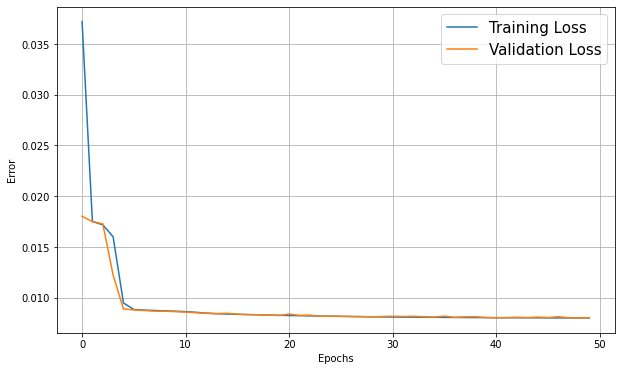

In [ ]:
# Test Loss
col_model.evaluate(x_test_col,x_test_col)

# Plot Training Loss and Validation Loss
plt.figure(figsize=(10,6))
plt.plot(range(len(col_history.history['loss'    ])), col_history.history['loss'    ], label='Training Loss')
plt.plot(range(len(col_history.history['val_loss'])), col_history.history['val_loss'], label='Validation Loss')
matplotlib.rc('font', size=15)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.grid()

# Printing Reconstructions and side lenghts
reconstructed = col_model.predict(x_test_col)
for i in range(3):
    # Display original and reconstructed
    vx,vy,vz = np.array_split(x_test_col[i] , 3)
    vvx,vvy,vvz = np.array_split(reconstructed[i] , 3)

    print("Percent Error in each side roconstruction:",
          (np.abs(np.linalg.norm(vx-vy)-np.linalg.norm(vvx-vvy)))/np.abs(np.linalg.norm(vx-vy)),
          (np.abs(np.linalg.norm(vy-vz)-np.linalg.norm(vvy-vvz)))/np.abs(np.linalg.norm(vy-vz)),
          (np.abs(np.linalg.norm(vz-vx)-np.linalg.norm(vvz-vvx)))/np.abs(np.linalg.norm(vz-vx)),"\n")
    Plot_2(vx,vy,vz,vvx,vvy,vvz)

In [ ]:
mat_model   = three_layer_model_mat(loss=loss_function_mat)
mat_history = mat_model.fit(x_train_mat, x_train_mat,     
                                        epochs=200,
                                        batch_size=128,
                                        validation_data=(x_val_mat, x_val_mat),
                                        verbose = 1)

Epoch 1/200
1389/1389 [==============================] - 33s 23ms/step - loss: 0.0752 - val_loss: 0.0413
Epoch 2/200
1389/1389 [==============================] - 34s 24ms/step - loss: 0.0394 - val_loss: 0.0331
Epoch 3/200
1389/1389 [==============================] - 34s 25ms/step - loss: 0.0313 - val_loss: 0.0285
Epoch 4/200
1389/1389 [==============================] - 35s 25ms/step - loss: 0.0284 - val_loss: 0.0255
Epoch 5/200
1389/1389 [==============================] - 34s 25ms/step - loss: 0.0239 - val_loss: 0.0193
Epoch 6/200
1389/1389 [==============================] - 35s 25ms/step - loss: 0.0189 - val_loss: 0.0176
Epoch 7/200
1389/1389 [==============================] - 34s 25ms/step - loss: 0.0175 - val_loss: 0.0168
Epoch 8/200
1389/1389 [==============================] - 33s 24ms/step - loss: 0.0165 - val_loss: 0.0156
Epoch 9/200
1389/1389 [==============================] - 34s 25ms/step - loss: 0.0157 - val_loss: 0.0149
Epoch 10/200
1389/1389 [==============================]

695/695 [==============================] - 7s 10ms/step - loss: 0.0034
Percent Error in each side roconstruction: 0.012610906 0.08674378 0.10765617 

Percent Error in each side roconstruction: 0.08753449 0.19089507 0.02219844 

Percent Error in each side roconstruction: 0.020838663 0.23853198 0.09416741 

Percent Error in each side roconstruction: 0.059668213 0.021061992 0.0065353382 

Percent Error in each side roconstruction: 0.0009925994 0.011109395 0.061141614 

Percent Error in each side roconstruction: 0.091289304 0.12523969 0.03239045 



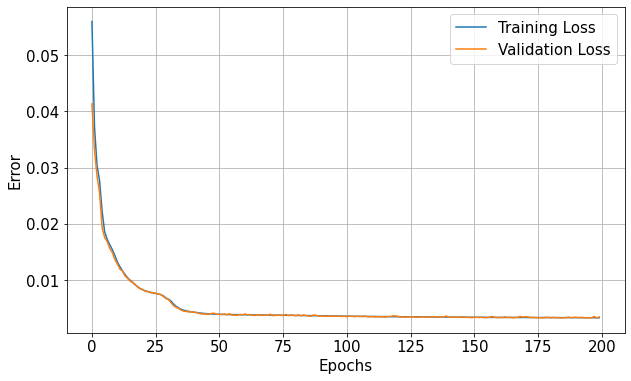

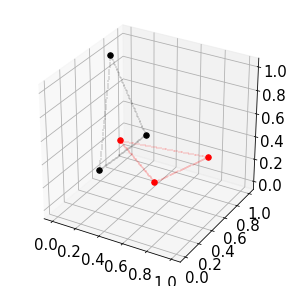

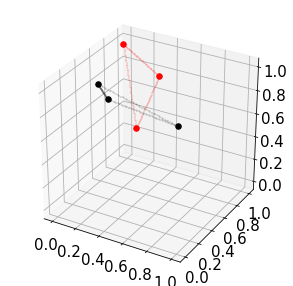

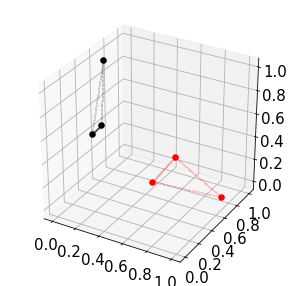

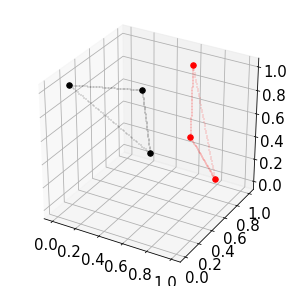

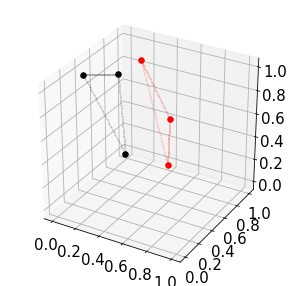

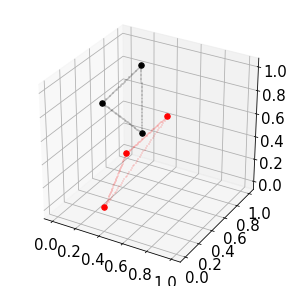

In [ ]:
# Test Loss
mat_model.evaluate(x_test_mat,x_test_mat)

# Plot Training Loss and Validation Loss
plt.figure(figsize=(10,6))
plt.plot(range(len(mat_history.history['loss'    ])), mat_history.history['loss'    ], label='Training Loss')
plt.plot(range(len(mat_history.history['val_loss'])), mat_history.history['val_loss'], label='Validation Loss')
matplotlib.rc('font', size=15)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.grid()

# Printing Reconstructions and side lenghts
reconstructed = mat_model.predict(x_test_mat)
for i in range(6):
    # Display original and reconstructed
    vx,vy,vz    = np.array_split(x_test_mat[i].flatten()    , 3)
    vvx,vvy,vvz = np.array_split(reconstructed[i].flatten() , 3)

    print("Percent Error in each side roconstruction:", (np.abs(np.linalg.norm(vx-vy)-np.linalg.norm(vvx-vvy)))/np.abs(np.linalg.norm(vx-vy)), 
                                                        (np.abs(np.linalg.norm(vy-vz)-np.linalg.norm(vvy-vvz)))/np.abs(np.linalg.norm(vy-vz)),
                                                        (np.abs(np.linalg.norm(vz-vx)-np.linalg.norm(vvz-vvx)))/np.abs(np.linalg.norm(vz-vx)),"\n")
    Plot_2(vx,vy,vz,vvx,vvy,vvz)

## Latent dim comparison




 ==================== dim = 3 =================== 


Epoch 1/150
1389/1389 [==============================] - 3s 2ms/step - loss: 0.0590 - val_loss: 0.0544
Epoch 2/150
1389/1389 [==============================] - 3s 2ms/step - loss: 0.0540 - val_loss: 0.0500
Epoch 3/150
1389/1389 [==============================] - 3s 2ms/step - loss: 0.0494 - val_loss: 0.0478
Epoch 4/150
1389/1389 [==============================] - 3s 2ms/step - loss: 0.0473 - val_loss: 0.0450
Epoch 5/150
1389/1389 [==============================] - 3s 2ms/step - loss: 0.0447 - val_loss: 0.0427
Epoch 6/150
1389/1389 [==============================] - 3s 2ms/step - loss: 0.0426 - val_loss: 0.0422
Epoch 7/150
1389/1389 [==============================] - 3s 2ms/step - loss: 0.0414 - val_loss: 0.0412
Epoch 8/150
1389/1389 [==============================] - 3s 2ms/step - loss: 0.0406 - val_loss: 0.0402
Epoch 9/150
1389/1389 [==============================] - 2s 2ms/step - loss: 0.0398 - val_loss: 0.0393
Epoch 10/150
1389/

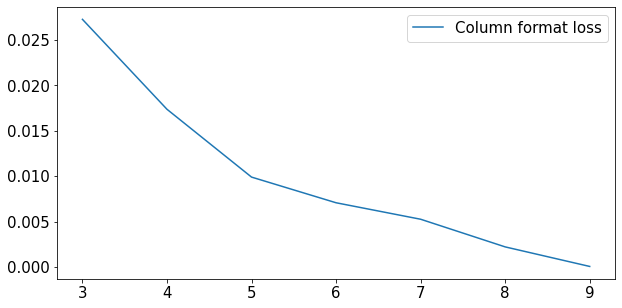

In [ ]:
latent_dims   = np.arange(3,10)
col_test_loss = []

for dim in latent_dims:
  print('\n\n ================================================\n',
        '==================== dim = %d =================== \n'%(dim),
        '================================================\n\n')
  layers =[[256,  'relu'],
           [dim,'relu' ],
           [256,  'relu'    ],
           [9,  'sigmoid']]
  
  col_model   = n_layer_model_col(layers = layers)
  col_history = col_model.fit(x_train_col, x_train_col,     # For autoencoders input data = target data
                                          epochs=150,
                                          batch_size=128,
                                          validation_data=(x_val_col, x_val_col),
                                          verbose = 1)

  col_test_loss.append(col_model.evaluate(x_test_col,x_test_col) )


plt.figure(figsize=(10,5))
plt.plot(latent_dims,col_test_loss, label = 'Column format loss' )
plt.legend()

In [ ]:
layers =[ [256,  'relu'   ],
          [3,    'relu'   ],
          [256,  'relu'   ],
          [9,    'sigmoid']]

col_model   = n_layer_model_col(layers = layers)
col_history = col_model.fit(x_train_col, x_train_col,     # For autoencoders input data = target data
                                        epochs=200,
                                        batch_size=32,
                                        validation_data=(x_val_col, x_val_col),
                                        verbose = 1)

Epoch 1/200
5556/5556 [==============================] - 9s 1ms/step - loss: 0.0652 - val_loss: 0.0582
Epoch 2/200
5556/5556 [==============================] - 8s 1ms/step - loss: 0.0573 - val_loss: 0.0551
Epoch 3/200
5556/5556 [==============================] - 8s 1ms/step - loss: 0.0546 - val_loss: 0.0528
Epoch 4/200
5556/5556 [==============================] - 8s 1ms/step - loss: 0.0535 - val_loss: 0.0526
Epoch 5/200
5556/5556 [==============================] - 8s 1ms/step - loss: 0.0523 - val_loss: 0.0508
Epoch 6/200
5556/5556 [==============================] - 8s 1ms/step - loss: 0.0514 - val_loss: 0.0497
Epoch 7/200
5556/5556 [==============================] - 8s 1ms/step - loss: 0.0504 - val_loss: 0.0504
Epoch 8/200
5556/5556 [==============================] - 9s 2ms/step - loss: 0.0503 - val_loss: 0.0531
Epoch 9/200
5556/5556 [==============================] - 8s 1ms/step - loss: 0.0504 - val_loss: 0.0510
Epoch 10/200
5556/5556 [==============================] - 8s 1ms/step - l